In [1]:
#EMAIL SPAM DETECTION

In [2]:
#IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
#LOADING AND READING DATA

In [5]:
data=pd.read_csv('spam.csv',encoding='Latin-1')

In [6]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [8]:
data.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
#EXPLORATORY DATA ANALYSIS

In [10]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [15]:
data= data[['v1', 'v2']]
data.columns = ['words', 'sentence']
data.head()

,words,sentence
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#VISUALIZATION

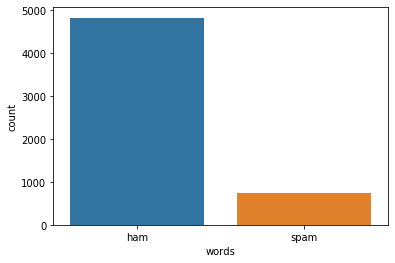

In [17]:
sns.countplot(data['words'])
plt.show()

In [18]:
data['words'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: words, dtype: float64

In [19]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GRACY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stemmer= PorterStemmer()
corpus = []
for i in range(0, len(data)):
    view = re.sub('[^a-zA-Z]', ' ',data['sentence'][i])
    view = view.lower()
    view = view.split()
    view = [stemmer.stem(word) for word in view if not word in stopwords.words('english')]
    view = ' '.join(view)
    corpus.append(view)

In [21]:
corpus[1]

'ok lar joke wif u oni'

In [22]:
#MODEL BUILDING

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()


In [24]:
Y = pd.get_dummies(data['words'])
Y =Y.iloc[:, 1].values

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.3,random_state=0)

In [26]:
classifiers = {
    "Multinomial": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}


In [28]:
for model1, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Classifier: {model1}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, y_pred))
    print("\n")

Classifier: Multinomial
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1434
           1       0.92      0.97      0.94       238

    accuracy                           0.98      1672
   macro avg       0.96      0.98      0.97      1672
weighted avg       0.98      0.98      0.98      1672

Confusion Matrix:
[[1413   21]
 [   8  230]]


Classifier: Random Forest
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1434
           1       1.00      0.80      0.89       238

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672

Confusion Matrix:
[[1434    0]
 [  47  191]]


Classifier: Support Vector Machine
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

In [29]:
#SAVING THE MODEL

In [30]:
import pickle

In [31]:
for model1, clf in classifiers.items():
    filename = model1 + ".pkl"
    pickle.dump(clf, open(filename, 'wb'))